### `manufacturing` Python  package- Ways to analyze manufacturing data 

TEver heard of Six Sigma? It's a methodology for achieving near-perfect quality in manufacturing. But what if you could leverage Six Sigma tools right from your Python environment? That's where the manufacturing package comes in!

he modern factory floor generates a deluge of data, from sensor readings to production logs.  Python offers a robust ecosystem of libraries to harness this data for improved efficiency and quality control. Analyzing process data allows for the identification of trends, anomalies, and potential quality issues, enabling proactive quality control measures.  Furthermore, production data analysis reveals bottlenecks, allowing for optimized scheduling and maximized efficiency. These libraries, akin to specialized software modules, empower sophisticated data manipulation and analysis.

Core libraries like Pandas excel at wrangling tabular data, the lifeblood of manufacturing records.  Pandas allows for data cleaning, transformation, and analysis, forming the bedrock of most data workflows.  NumPy, the workhorse for numerical computations, underpins many libraries and provides efficient data structures for large datasets.  SciPy, building on NumPy's foundation, offers a broader suite of scientific and engineering functions frequently employed in manufacturing analysis.

By mastering these tools, manufacturers can transform raw data into actionable insights, driving data-driven decision making and achieving operational excellence.

But, before going into ways how to process manufacturing data one should first understanding its' core concepts like CpK and Six Sigma Standards.

#### What is CpK?

CpK, or the Process Capability Index, is a statistical measure that shows how well a process is performing relative to its specification limits, or how well a process meets customer specifications. Developed in the 1980s, it considers both the spread of a process's outputs and how centered it is within the acceptable range. A higher Cpk indicates a more capable process with fewer defects. Values below 1 suggest frequent production of out-of-specification items, while those above 1.33 signal a highly capable process. Learn more about Cpk at [Six Sigma Study Guide](sixsigmastudyguide.com).

- **Cp** measures the process potential by comparing the spread of the process to the specification limits.
- **Cpk** measures the process performance by considering both the process spread and its centering relative to the specification limits.

#### Formula for CpK

The formula for CpK is:

$$Cpk = \min \left( \frac{3\sigma \text{USL} - \mu}{3\sigma}, \frac{3\sigma \mu - \text{LSL}}{3\sigma} \right)$$


where:
- $\text{USL}$ is the upper specification limit.
- $\text{LSL}$ is the lower specification limit.
- $\mu$ is the process mean.
- $\sigma$ is the process standard deviation.

A higher CpK value indicates a more capable process. **Values below 1 suggest frequent production of out-of-specification items, while those above 1.33 signal a highly capable process.**

#### What is Six Sigma?

Six Sigma is a data-driven quality improvement methodology that strives for near perfection. Developed by Motorola in the 1980s, it focuses on minimizing defects and variation in any process. It uses a set of statistical tools like Cpk to identify and eliminate the root causes of errors. **A Six Sigma process aims for only 3.4 defects per million opportunities (DPMO), signifying exceptional quality.** Six Sigma certifications demonstrate expertise in this methodology. You can find more details on Six Sigma principles at [Six Sigma.us](sixsigma.us). 

- **Six Sigma Standard**: Refers to a process that produces output within ±6 standard deviations (sigma) from the mean, resulting in a very low defect rate.
- **Defects Per Million Opportunities (DPMO)**: At Six Sigma level, the process produces only 3.4 defects per million opportunities.

* **Sigma Level:** Indicates how many standard deviations a process falls within its specification limits.
* **5 Sigma:** Exceptionally high quality with around 233 DPMO (0.023% defect rate).
* **4 Sigma:** Very good quality with roughly 6,210 DPMO (0.02% defect rate).
* **3 Sigma:** Considered an industry standard with approximately 66,807 DPMO (0.7% defect rate).

So, while a 4 sigma process has a defect rate roughly 27 times higher than a 5 sigma process, they both represent a significant reduction in defects compared to a 3 sigma process.

#### Benefits of Six Sigma

- **Improved Quality**: Reduces defects and improves product quality.
- **Cost Savings**: Minimizes waste and reduces costs associated with defects.
- **Customer Satisfaction**: Enhances customer satisfaction by consistently meeting or exceeding expectations.


#### Key Features of the `manufacturing` Package

This nifty package brings the power of Six Sigma to your fingertips.  Need to calculate a key metric like Cpk? The manufacturing package has you covered. Cpk helps you assess how well your process meets customer specifications, ensuring you're producing high-quality goods.

But the manufacturing package isn't a one-trick pony. It also offers tools for calculating other Six Sigma metrics, making it a valuable asset for any data-driven manufacturer. Whether you're a seasoned Six Sigma expert or just starting your quality control journey, this package can streamline your workflow and empower you to make data-driven decisions.

1. **Control Charts**: These are used to monitor the stability of manufacturing processes over time. The package supports various types of control charts, including:
   - **X-bar and R charts**: For monitoring the mean and range of a process.
   - **P charts**: For monitoring the proportion of defective items in a process.
   - **C charts**: For monitoring the count of defects per unit.

2. **Process Capability Indices**: These indices measure how well a process can produce output within specified limits. The package includes functions to calculate:
   - **Cp and Cpk**: Indices that measure a process's capability and its centering within specification limits.
   - **Pp and Ppk**: Similar to Cp and Cpk but used for overall process performance.

3. **Data Analysis Tools**: The package provides tools for:
   - **Descriptive statistics**: To summarize data.
   - **Histograms**: To visualize data distribution.
   - **Box plots**: To identify outliers and data spread.


#### Example Use Cases

Let's explore some practical examples of how the `manufacturing` package can be used.

##### 1. Creating an X-bar and R Chart

Suppose you are monitoring the diameter of metal rods produced in a factory. You collect samples of five rods every hour and measure their diameters.

In [65]:
!pip3 install manufacturing

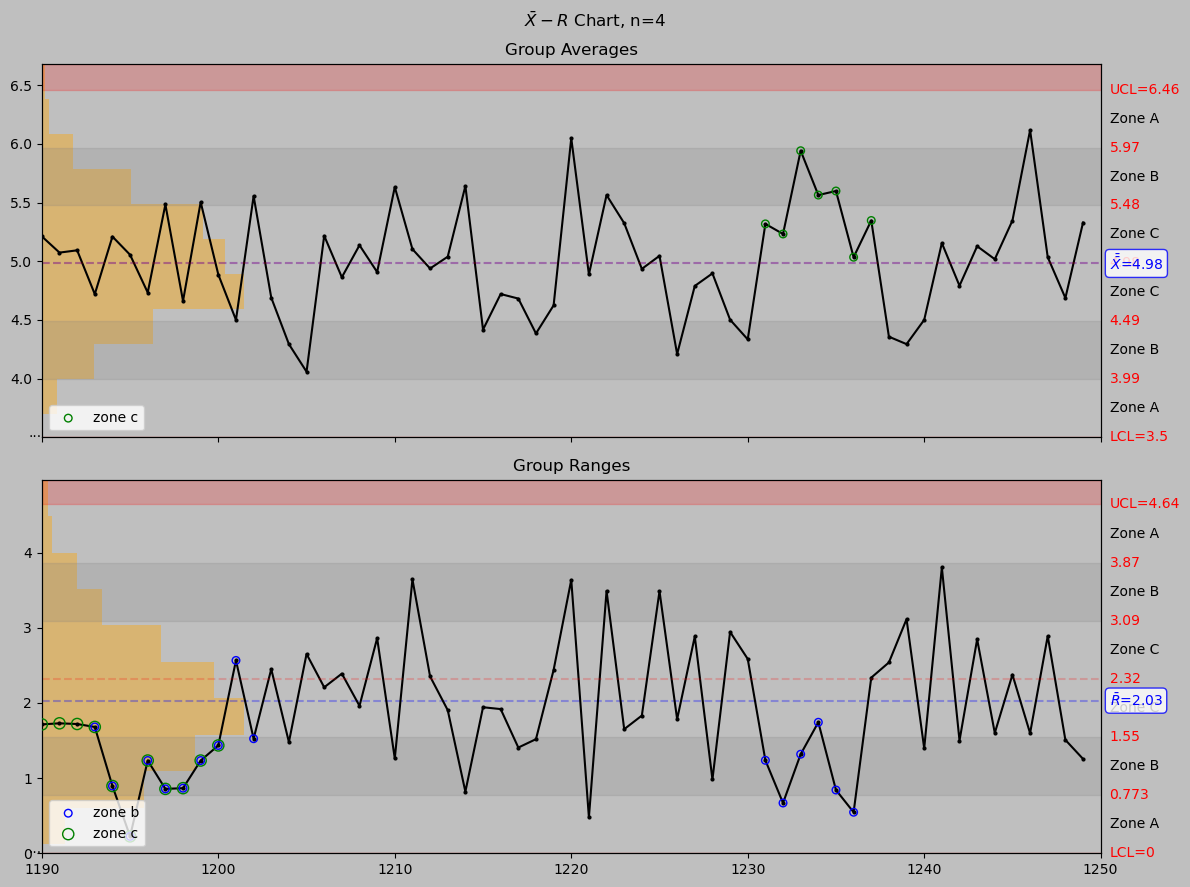

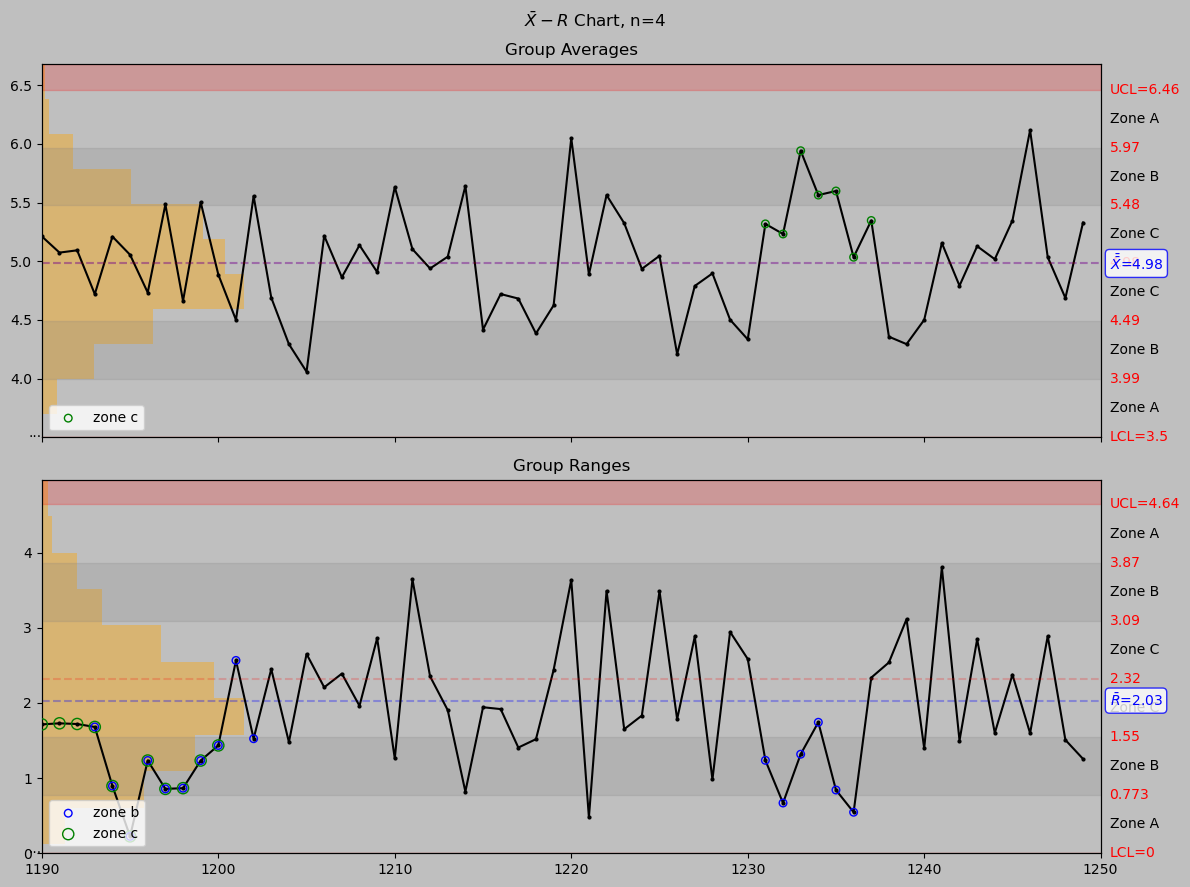

In [66]:
import manufacturing as mn
import numpy as np

# Generate sample data
data = []
for _ in range(1000):
    subgroup = np.random.randn(5) + 5 # Adjust mean and standard deviation as needed
    data.extend(subgroup.tolist())

# Create the X-bar and R chart
mn.xbar_r_chart(data)

This code generates an X-bar and R chart, helping you visualize whether the diameter measurements are within acceptable control limits.

##### 2. Calculating Process Capability Indices

Assume you have a process with a target diameter of 5.0 units and tolerance limits of ±0.2 units. You want to calculate the Cp and Cpk indices to understand the process capability.

In [67]:
import numpy as np

# Specification limits
USL = 5.9  # Upper specification limit
LSL = 4.1  # Lower specification limit

# Calculate Cp and Cpk
pp_value = mn.calc_pp(data, USL, LSL)
ppk_value = mn.calc_ppk(data, USL, LSL)

print(f"Pp: {pp_value}")
print(f"Ppk: {ppk_value}")

Pp: 0.3050719299734392
Ppk: 0.2988510770619336


Alternative way

In [68]:
import numpy as np

def calculate_cp_cpk(data, USL, LSL):
    """Calculates the process capability indices Cp and Cpk.

    Args:
        data: A list or NumPy array of data points.
        USL: Upper specification limit.
        LSL: Lower specification limit.

    Returns:
        A tuple containing the Cp and Cpk values.
    """

    std_dev = np.std(data)
    process_spread = USL - LSL
    process_capability = process_spread / (6 * std_dev)

    cpk_numerator = min(USL - np.mean(data), np.mean(data) - LSL)
    cpk_denominator = 3 * std_dev

    cpk = cpk_numerator / cpk_denominator

    return process_capability, cpk

# Example usage
USL = 5.9
LSL = 4.1

cp, cpk = calculate_cp_cpk(data, USL, LSL)
print(f"Cp: {cp}")
print(f"Cpk: {cpk}")

Cp: 0.3051024417432785
Cpk: 0.2988809666531534


### Plotting 

<Axes: >

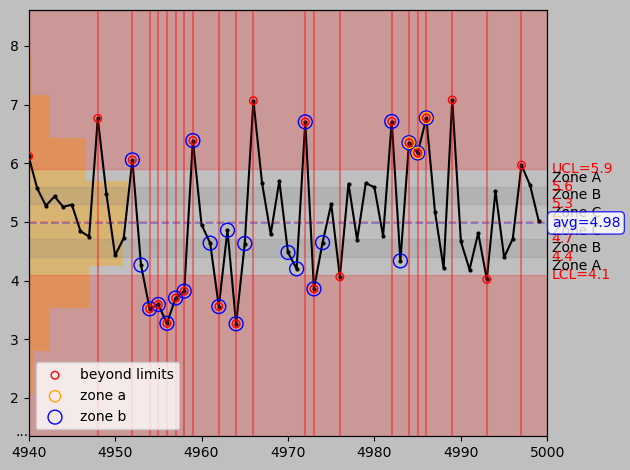

In [69]:
# Control plot
mn.control_chart_base(data, USL, LSL)

If we would have subgroups of data, then ploting Cpk plot would make a lot of sense.

the zupper and zlower limits are strongly imbalanced, indicating that the process is off-center with reference to the limits
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


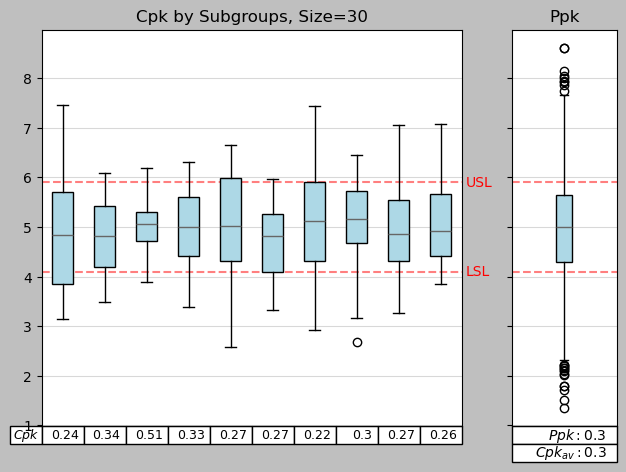

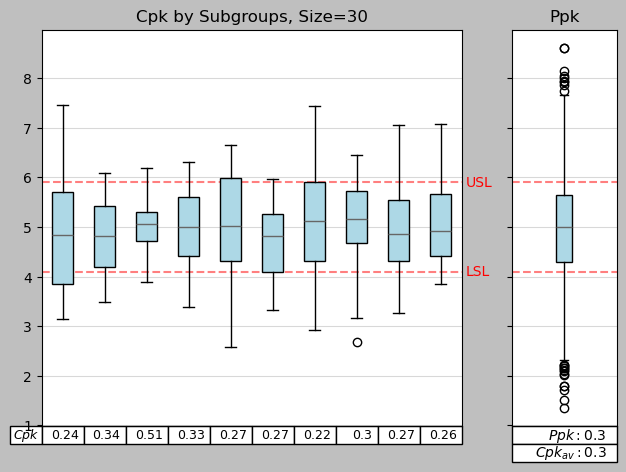

In [70]:
# Cpk Plot
mn.cpk_plot(data, USL, LSL)

These calculations show how capable your process is in meeting the specification limits.

#### Benefits for Non-Manufacturing Audiences

While the `manufacturing` package is tailored for manufacturing processes, its tools for statistical analysis and data visualization can be beneficial for various fields. For example:
- **Quality Control in Service Industries**: Control charts can be used to monitor service quality metrics like customer wait times or error rates.
- **Healthcare**: Hospitals can use these tools to monitor patient recovery times or infection rates.
- **Software Development**: Development teams can track defect rates and process stability over different software releases.

### Alternatives to the `manufacturing` Python Package

While the `manufacturing` package is a robust tool for statistical process control (SPC) and process capability analysis, several other Python packages offer similar functionalities. Here are a few notable ones:

1. **SciPy and NumPy**: These are fundamental packages for scientific computing in Python. While not specifically tailored for manufacturing, they provide extensive capabilities for statistical analysis and data manipulation, which can be used to create custom SPC tools.

2. **PySPC**: This package is designed specifically for statistical process control and includes functions for creating control charts and other SPC tools.

3. **Quality-Control**: This package focuses on quality control methods and includes tools for control charts, process capability indices, and other SPC techniques.

### Comparison of Packages

#### 1. SciPy and NumPy

**Pros**:
- Highly versatile and widely used in the data science community.
- Extensive documentation and community support.
- Can be used for a wide range of statistical and scientific computing tasks.

**Cons**:
- Requires more effort to implement SPC-specific tools compared to dedicated packages.

#### 2. PySPC

**Pros**:
- Specifically designed for SPC.
- Easy to use with built-in functions for creating various control charts.

**Cons**:
- Less widely used and supported compared to SciPy and NumPy.
- May have fewer features than more comprehensive packages.

#### 3. Quality-Control

**Pros**:
- Focuses on quality control methods.
- Provides tools for control charts and process capability indices.

**Cons**:
- May not be as comprehensive as other packages.
- Limited community support and documentation compared to larger packages.

### Example: Using PySPC for Control Charts

Let's look at an example of creating a control chart using the PySPC package.

<Axes: >

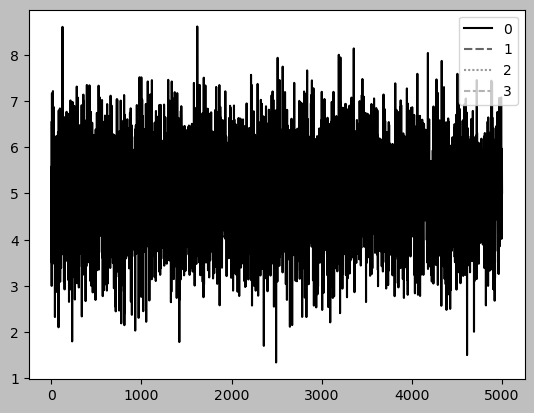

In [93]:
import pyspc
import seaborn as sns

# Create a control chart
chart = pyspc.xmr()
chr = chart.plot(data, size=1)
sns.lineplot(chr)

This code snippet demonstrates how to create an X-MR (individuals and moving range) chart using PySPC.

## Conclusion

Understanding key concepts like CpK and Six Sigma is crucial for improving manufacturing processes and ensuring high-quality output.

The `manufacturing` Python package is a versatile and user-friendly tool that simplifies the process of monitoring and improving production processes. Whether you're in manufacturing or another field, the statistical analysis and visualization capabilities of this package can help you ensure quality and efficiency in your operations.

Several Python packages can help you with SPC and process capability analysis, each with its own strengths and weaknesses.

For more information and detailed documentation of the `manufacturing` Python, you can visit the [official PyPI page](https://pypi.org/project/manufacturing/).

For further reading and practical examples, you can explore the documentation and resources provided by each package. Here are some links to get you started:
- [SciPy Documentation](https://docs.scipy.org/doc/scipy/)
- [NumPy Documentation](https://numpy.org/doc/stable/)
- [PySPC Documentation](https://pypi.org/project/pyspc/)
- [Quality-Control Package](https://pypi.org/project/quality-control/)